Recall that we implemented the gradient descent algorithm to solve $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$. The main ingredients in the gradient descent iterations are the descent direction $\mathbf{p}^k$ which is set to $-\nabla f(\mathbf{x}^k)$, and the step length $\eta^k$ which is found by solving an optimization problem (or sometimes taken as a constant value over all iterations). We used the following procedure in the previous lab:

\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$}  \\
& \textbf{Initialize } k=0 \\ 
& \mathbf{p}^k =-\nabla f(\mathbf{x}^k) \\ 
&\textbf{While } \| \mathbf{p}^k \|_2 > \tau \text{ do:}  \\   
&\quad \quad \eta^k = \arg\min_{\eta\geq 0} f(\mathbf{x}^k + \eta  \mathbf{p}^k) = \arg\min_{\eta\geq 0} f(\mathbf{x}^k - \eta  \nabla f(\mathbf{x}^k)) \\
&\quad \quad \mathbf{x}^{k+1} = \mathbf{x}^k + \eta^k \mathbf{p}^k = \mathbf{x}^k - \eta^k \nabla f (\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}
The step length $\eta^k$ can be found using a backtracking procedure illustrated below to find appropriate value of $\varepsilon$.

\begin{align}
& \textbf{Input:}  \text{ $\mathbf{x}^k$, $\mathbf{p}^k$, $\alpha^0$, $\rho \in (0,1)$, $\gamma \in (0,1)$ }  \\
& \textbf{Initialize } \alpha=\alpha^0 \\ 
&\textbf{While } f(\mathbf{x}^k + \alpha \mathbf{p}^k)   > f(\mathbf{x}^k) + \gamma \alpha \nabla f(\mathbf{x}^k)^\top \mathbf{p}^k \text{ do:}  \\   
&\quad \quad \alpha = \rho \alpha  \\
&\textbf{End While} \\
&\textbf{Output: } \alpha
\end{align}  


in this case cases of quadratic functions, a closed form analytical solution for the minimizer of the optimization problem $\min_{\eta \geq 0} f({\mathbf{x}}^k + \eta {\mathbf{p}}^k)$ exists. However finding a closed form expression as a solution to this optimization problem to find a suitable step length might not always be possible. To tackle general situations, we will try to devise a different procedure in this lab. 
To find the step length, we will use the following property: Suppose a non-zero $\mathbf{p} \in {\mathbb{R}}^n$ is a descent direction at point $\mathbf{x}$, and let $\gamma \in (0,1)$. Then there exists $\varepsilon >0$ such that  
\begin{align}
f(\mathbf{x}+\alpha \mathbf{p}) \leq f(\mathbf{x}) + \gamma \alpha \nabla f(\mathbf{x})^\top \mathbf{p}, \ \forall \alpha \in (0,\varepsilon].  
\end{align}



In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt

In [ ]:
def evalf(x):  
  assert type(x) is np.ndarray and len(x) == 2  
  return 512*(x[1]-(x[0])**2)**2 + (4-x[0])**2
def evalg(x):  
  assert type(x) is np.ndarray and len(x) == 2 
  return np.array([2048*x[0]*((x[0]**2)-x[1])+2*(x[0]-4), 1024*(x[1]-x[0]**2)])

In [ ]:
def compute_steplength_exact(grad, A):
  assert type(grad) is np.ndarray and len(grad) == 2 
  assert type(A) is np.ndarray and A.shape[0] == 2 and  A.shape[1] == 2
  Q = 2*A
  step_length = (grad.dot(grad.transpose()))/((grad.dot(Q)).dot(grad.transpose()))
  return step_length
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  alpha = alpha_start
  while(evalf(x - alpha*gradf) > evalf(x) - gamma*alpha*np.dot(gradf,gradf.T) ):
    alpha = rho*alpha
  return alpha

In [ ]:
EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3

In [ ]:
def find_minimizer(start_x, tol, line_search_type, *args):
  assert type(start_x) is np.ndarray and len(start_x) == 2  
  assert type(tol) is float and tol>=0 
  A = np.array([[1, 0],[0,1]])
  x = start_x
  g_x = evalg(x)
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)
  k = 0
  while (np.linalg.norm(g_x) > tol): 
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A)
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,g_x, alpha_start,rho, gamma) 
    elif line_search_type == CONSTANT_STEP_LENGTH: 
      step_length = 0.1
    else:  
      raise ValueError('Line search type unknown')   
    x = np.subtract(x, np.multiply(step_length,g_x)) 
    k += 1 
    g_x = evalg(x) 
  return x , evalf(x) ,k

In [ ]:
my_start_x = np.array([4.00001,16.00001])
my_tol= 1e-5
x_opt_bls, y_opt_bls, k= find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1, 0.5,0.5)
print('minimizer:',x_opt_bls)
print('minimum value:',y_opt_bls)


Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5
minimizer: [ 4.00000138 16.00001108]
minimum value: 1.917428855384997e-12


# minimizes q(x + neta.p).  we have to equate d[q(x+ neta.p)]/d[neta] = 0, But this equation  are forms implicit in neta therefore we can't find a closed  solution of neta then the  exact line search are  q(x + neta.p)



In [ ]:
x_arr = []
y_arr = []
k_arr = []
k_els_arr = []
my_start_x = np.array([4.00001,16.00001])
my_tol= 1e-10
alpha_array = [1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
for i in list(alpha_array):
  x_opt_bls, y_opt_bls, k_bls= find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, i, 0.5,0.5)
  x_arr.append(x_opt_bls)
  y_arr.append(y_opt_bls)
  k_arr.append(k_bls)

Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5
Params for Backtracking LS: alpha start: 0.9 rho: 0.5  gamma: 0.5
Params for Backtracking LS: alpha start: 0.75 rho: 0.5  gamma: 0.5
Params for Backtracking LS: alpha start: 0.6 rho: 0.5  gamma: 0.5
Params for Backtracking LS: alpha start: 0.5 rho: 0.5  gamma: 0.5
Params for Backtracking LS: alpha start: 0.4 rho: 0.5  gamma: 0.5
Params for Backtracking LS: alpha start: 0.25 rho: 0.5  gamma: 0.5
Params for Backtracking LS: alpha start: 0.1 rho: 0.5  gamma: 0.5
Params for Backtracking LS: alpha start: 0.01 rho: 0.5  gamma: 0.5


In [ ]:
df = pd.DataFrame({'Starting alpha':alpha_array,
                   'Minimizer':x_arr,
                   'Objective':y_arr,
                   'Iterations BLS':k_arr})
df

Starting alpha                                Minimizer     Objective  \
0            1.00    [4.000001384666893, 16.0000110768401]  1.917429e-12   
1            0.90  [4.000001384607284, 16.000011076865455]  1.917137e-12   
2            0.75   [4.000001384655491, 16.00001107685177]  1.917350e-12   
3            0.60  [4.000001384673951, 16.000011076843325]  1.917477e-12   
4            0.50    [4.000001384666893, 16.0000110768401]  1.917429e-12   
5            0.40  [4.000001384636402, 16.000011076856186]  1.917247e-12   
6            0.25    [4.000001384666893, 16.0000110768401]  1.917429e-12   
7            0.10  [4.000001384636402, 16.000011076856186]  1.917247e-12   
8            0.01  [4.000001384648498, 16.000011076847304]  1.917312e-12   

   Iterations BLS  
0              16  
1               5  
2               8  
3              12  
4              16  
5               7  
6              16  
7               7  
8              11

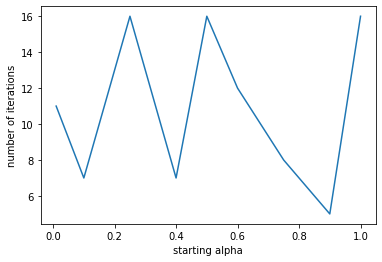

In [ ]:
import matplotlib.pyplot as plt

plt.plot(alpha_array,k_arr)
plt.xlabel('starting  of alpha')
plt.ylabel(' iterations')
plt.show()

in this case the value of alpha no changes of minimum value

in this  observation in number of iterations as starting alpha increases where the minimum the value of  alpha are = 0.1, 0.4,0.9 and maximum arealpha = 0.25,0.5,1 

In [ ]:
x_arr = []
y_arr = []
k_arr = []
k_els_arr = []
my_start_x = np.array([4.00001,16.00001])
my_tol= 1e-10
rho_array = [0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
for i in list(rho_array):
  x_opt_bls, y_opt_bls, k_bls= find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1, i,0.5)
  x_arr.append(x_opt_bls)
  y_arr.append(y_opt_bls)
  k_arr.append(k_bls)

Params for Backtracking LS: alpha start: 1 rho: 0.9  gamma: 0.5
Params for Backtracking LS: alpha start: 1 rho: 0.75  gamma: 0.5
Params for Backtracking LS: alpha start: 1 rho: 0.6  gamma: 0.5
Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5
Params for Backtracking LS: alpha start: 1 rho: 0.4  gamma: 0.5
Params for Backtracking LS: alpha start: 1 rho: 0.25  gamma: 0.5
Params for Backtracking LS: alpha start: 1 rho: 0.1  gamma: 0.5
Params for Backtracking LS: alpha start: 1 rho: 0.01  gamma: 0.5


In [ ]:
df = pd.DataFrame({'Starting rho':rho_array,
                   'Minimizer':x_arr,
                   'Objective':y_arr,
                   'Iterations BLS':k_arr})
df

Starting rho                                Minimizer     Objective  \
0          0.90   [4.000001384682313, 16.00001107686025]  1.917530e-12   
1          0.75  [4.000001384690636, 16.000011076855635]  1.917599e-12   
2          0.60  [4.000001384597704, 16.000011076863156]  1.917114e-12   
3          0.50    [4.000001384666893, 16.0000110768401]  1.917429e-12   
4          0.40  [4.000001384677176, 16.000011076836984]  1.917505e-12   
5          0.25  [4.000001384690074, 16.000011076829498]  1.917612e-12   
6          0.10    [4.000001384615596, 16.0000110768505]  1.917163e-12   
7          0.01   [4.000001384704108, 16.00001107682268]  1.917743e-12   

   Iterations BLS  
0               4  
1               5  
2               6  
3              16  
4              19  
5              38  
6              11  
7             160

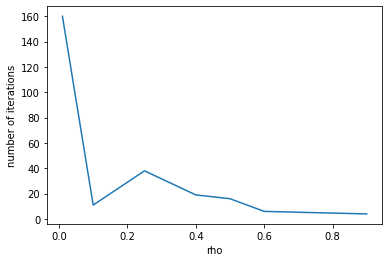

In [ ]:
plt.plot(rho_array,k_arr)
plt.xlabel('rho')
plt.ylabel('number of iterations')
plt.show()

in this case observation are: the value of the rho value  changes- no changes of the minimum value,number of iterations and this is decreasing when  rho are  increases, iterations is high when rho = 0.01 and  there is a steep down to rho = 0.1, then there is a peak at rho = 0.25 then the plot goes down in rho = 0.9,
